## Importing Libraries

In [472]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Data pre processing

### Fetch data

In [473]:
data=pd.read_csv('/home/nailsonseat/Desktop/Datasets/dataset_sunny.csv')
data

,Outlook,Temperature,Humidity,Windy,Play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [474]:
labels=data.columns.to_numpy()
data=data.to_numpy().T

### Extract training and test data

In [475]:
print(data.shape)

(5, 14)


In [476]:
def dataSplit(data,fraction):
    indices=np.arange(data.shape[1])
    np.random.shuffle(indices)
    data=data[:,indices]
    length=data.shape[1]-int(data.shape[1]*fraction)
    indices=np.arange(length)
    train,train_labels=data[:-1,:length],data[-1,:length]
    test,test_labels=data[:-1,length:],data[-1,length:]
    return train,train_labels,test,test_labels
    

In [477]:
X,Y,X_t,Y_t=dataSplit(data,0.2)
print(Y)
pd.DataFrame(X)


['yes' 'yes' 'no' 'no' 'yes' 'yes' 'yes' 'yes' 'yes' 'no' 'yes' 'no']


,0,1,2,3,4,5,6,7,8,9,10,11
0,overcast,overcast,rainy,sunny,rainy,rainy,sunny,overcast,overcast,sunny,sunny,sunny
1,cool,mild,cool,hot,mild,cool,mild,hot,hot,hot,cool,mild
2,normal,high,normal,high,high,normal,normal,normal,high,high,normal,high
3,True,True,True,False,False,False,True,False,False,True,False,False


### Print shapes

In [478]:
print(X.shape)
print(Y.shape)
print(labels)

(4, 12)
(12,)
['Outlook' 'Temperature' 'Humidity' 'Windy' 'Play']


## Naive Bayes

### Frequency function

In [479]:
def frequency(data,labels):
    frequency={}
    for i in range(len(data)):
        for j in range(len(data[i])):
            label=labels[i]+' '+str(data[i,j])
            if label not in frequency:
                frequency[label]=1
            else:
                frequency[label]+=1
    return list(frequency.items())

### Histogram for affecting factors vs frequency days

In [480]:
def histogram(data,title,x_label,y_label):  
    fig = plt.figure(figsize = (20, 5))
    labels=[]
    values=[]
    for i in range(len(data)):
            labels.append(data[i][0])
            values.append(data[i][1])
    plt.bar(labels,values, color ='blue',
            width = 0.2)
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

### Frequency Plot for Playable days

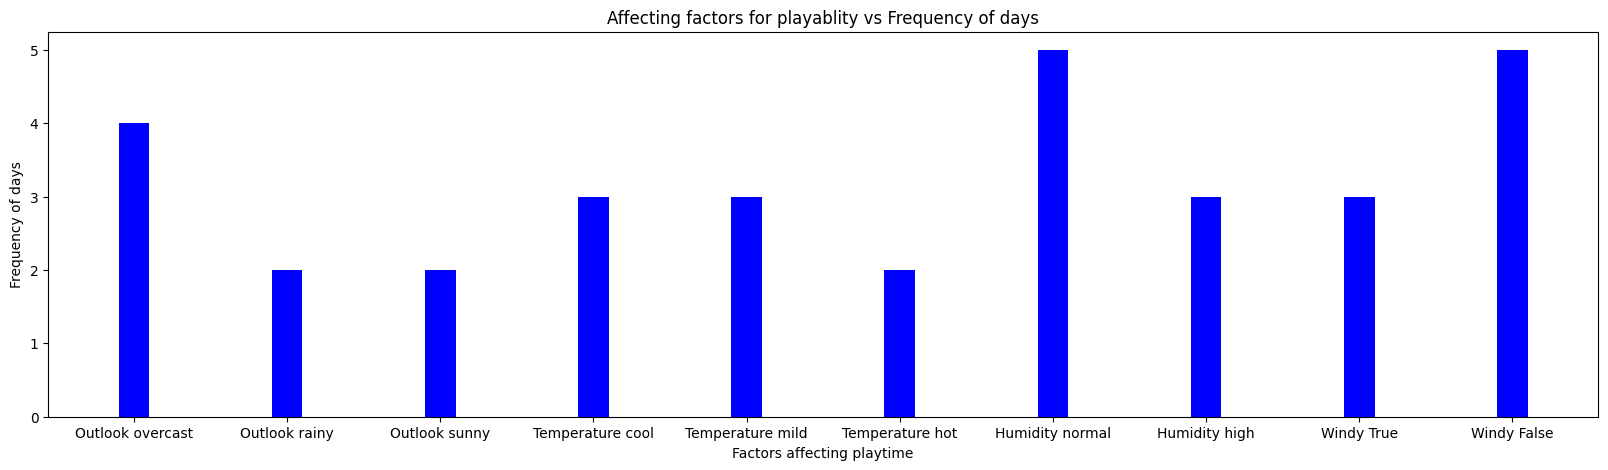

In [481]:
indices=np.where(Y=='yes')[0]
frequencies=frequency(X[:,indices],labels)
histogram(frequencies,"Affecting factors for playablity vs Frequency of days","Factors affecting playtime","Frequency of days")

### Frequency Plot for Non - Playable days

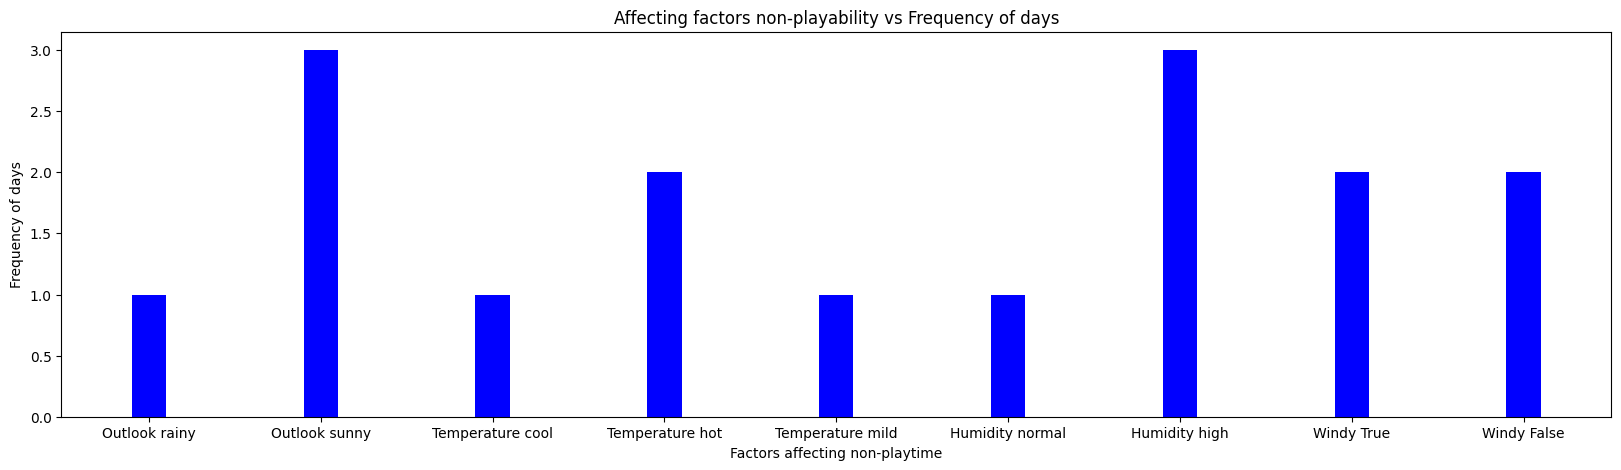

In [482]:
indices=np.where(Y=='no')[0]
frequencies=frequency(X[:,indices],labels)
histogram(frequencies,"Affecting factors non-playability vs Frequency of days","Factors affecting non-playtime","Frequency of days")